Corr function in labels


In [11]:
# Ensure pandas is available in this Jupyter environment, then import it
try:
	import pandas as pd
except ModuleNotFoundError:
	# Install pandas in the current Jupyter kernel and then import
	%pip install pandas
	import pandas as pd


In [12]:
#import data from csv file
data = pd.read_csv('insurance.csv')

print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [25]:
# import px & matplotlib for visualization
try:  import plotly.express as px
except ModuleNotFoundError:
    %pip install plotly
    import plotly.express as px

try:  import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

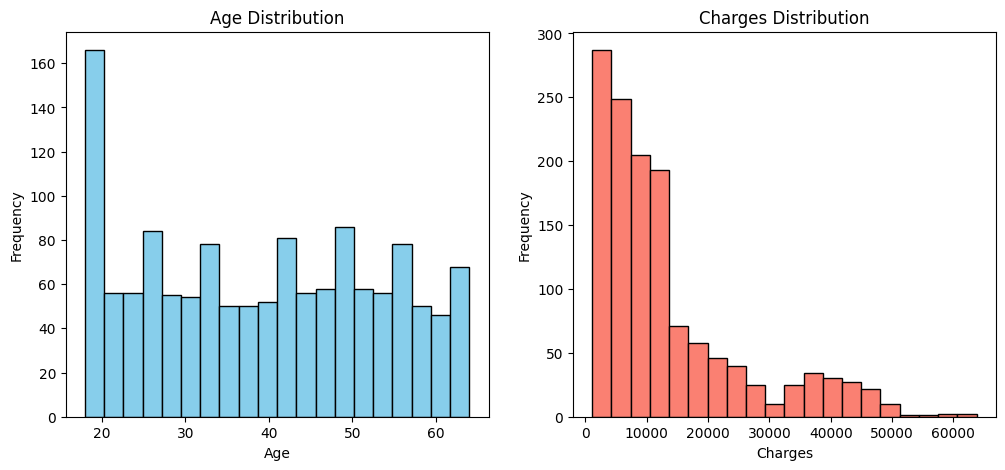

In [7]:
# create a histogram to visualize the distribution of age & charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.subplot(1, 2, 2)
plt.hist(data['charges'], bins=20, color='salmon', edgecolor='black')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [ ]:
fig = px.scatter(data, x='age', y='charges', color='smoker',opacity=0.8 , hover_data=['sex'],title='Age vs Charges Scatter Plot')
fig.update_traces(marker_size=5)
fig.show(renderer="browser")

# use the dummy data as which have the realation show we bise becuase if the relation are not show we bise the dummy data to show the relation ship the prediction of realtion will be incorrect .

In [16]:
fig = px.scatter(data, x='bmi', y='charges', color='smoker',opacity=0.8 , hover_data=['sex'],title='BMI vs Charges Scatter Plot')
fig.update_traces(marker_size=5)
fig.show(renderer="browser")

#Correlation 

In [17]:
data.charges.corr(data.bmi)  #Correlation

np.float64(0.19834096883362895)

In [18]:
data.charges.corr(data.age)  #Correlation

np.float64(0.2990081933306476)

#Linear Regression using Single Feature

In [22]:
# charges  = w * age +b 
def estimate_charges(age, w=256.9, b= -1234.5):
    return w * age + b


In [23]:
w = 50 # weight
b = 1000 # bias

non_smoker_df  = data[data['smoker'] == 'no']
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
print(estimated_charges)

1       1900
2       2400
3       2650
4       2600
5       2550
        ... 
1332    3600
1333    3500
1334    1900
1335    1900
1336    2050
Name: age, Length: 1064, dtype: int64


Text(0.5, 1.0, 'Estimated Charges vs Age for Non-Smokers')

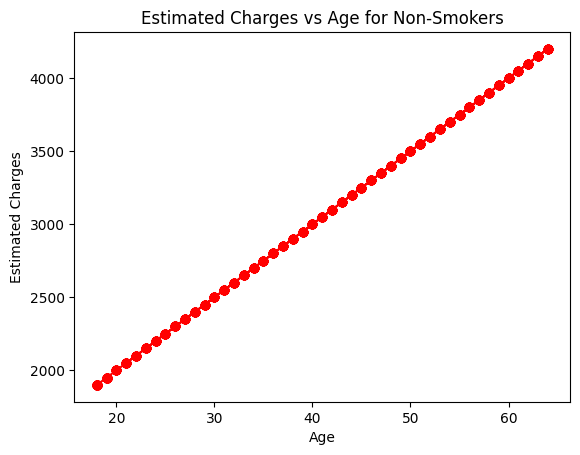

In [25]:

plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.title('Estimated Charges vs Age for Non-Smokers')

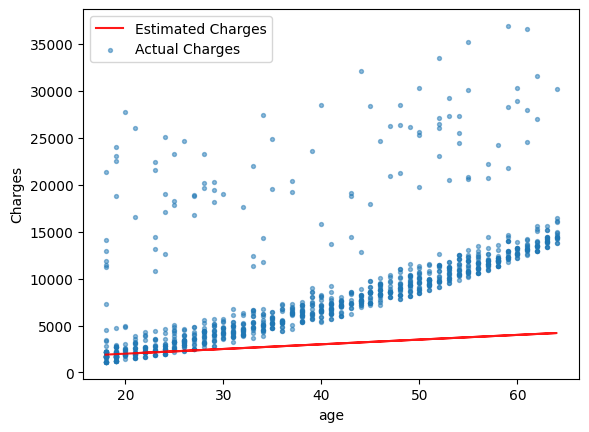

In [27]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges,'r',alpha=0.9)
plt.scatter(ages, target,s=8, alpha=0.5)
plt.xlabel('age')
plt.ylabel('Charges')
plt.legend(['Estimated Charges', 'Actual Charges'])

#Different bias & wight values 


In [30]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges,'r',alpha=0.9)
    plt.scatter(ages, target,s=8, alpha=0.5)
    plt.xlabel('age')
    plt.ylabel('Charges')
    plt.legend(['Estimated Charges', 'Actual Charges'])
    

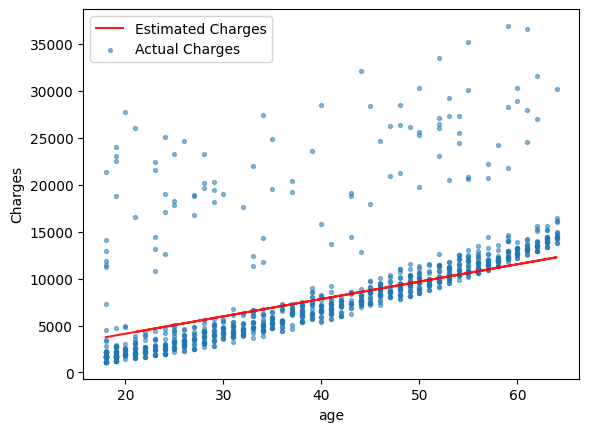

In [46]:
try_parameters(185, 425)  #Different bias & wight values

$$Loss function 

In [6]:
!pip install numpy --quiet
import numpy as np



def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))



In [5]:
target  = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, 185, 425)
rmse(target, predictions) 

NameError: name 'non_smoker_df' is not defined

In [4]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges,'r',alpha=0.9)
    plt.scatter(ages, target,s=8, alpha=0.5)
    plt.xlabel('age')
    plt.ylabel('Charges')
    plt.legend(['Estimated Charges', 'Actual Charges'])
    predictions = estimate_charges(non_smoker_df.age, w, b)
    print(f'RMSE for w={w}, b={b}: {rmse(target, predictions)}')

In [20]:
try_parameters(185, 455)  #Different bias & wight values

NameError: name 'estimate_charges' is not defined

$$Sk-Learn

In [2]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

In [13]:
non_smoker_df  = data[data['smoker'] == 'no']
inputs=non_smoker_df[['age']]
target=non_smoker_df['charges']                 

In [14]:
model = LinearRegression() 
model.fit(inputs, target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
model.predict([[40]])
predicted_charge = model.predict([[40]])
print(f'Predicted charge for a 40-year-old non-smoker: {predicted_charge[0]}')


Predicted charge for a 40-year-old non-smoker: 8598.535956682901


/home/kiranjeet-kour/Desktop/ML learning /scikit-learn/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/kiranjeet-kour/Desktop/ML learning /scikit-learn/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
rmse(target, model.predict(inputs))

np.float64(4662.505766636395)

In [18]:
#w 
model.coef_
#bias_
model.intercept_

np.float64(-2091.4205565650864)

RMSE for w=[267.24891283], b=-2091.4205565650864: 4662.505766636395


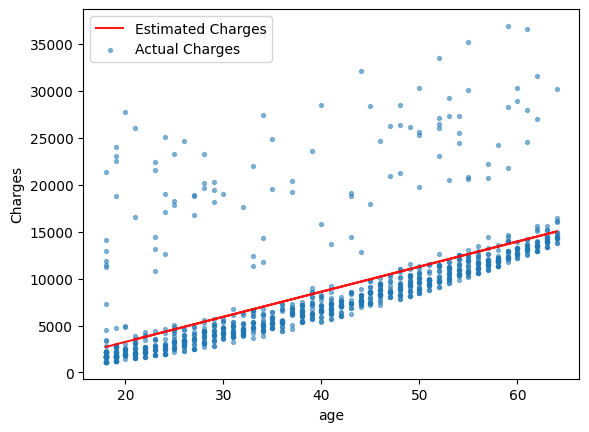

In [26]:
try_parameters(model.coef_, model.intercept_)

**Multiplefeature